In [2]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('tesla.csv')
df.head()

,date,close,volume,open,high,low
0,11:34,270.49,"4,787,699",264.50,273.88,262.2400
1,2018/10/15,259.59,6189026.0000,259.06,263.28,254.5367
2,2018/10/12,258.78,7189257.0000,261.00,261.99,252.0100
3,2018/10/11,252.23,8128184.0000,257.53,262.25,249.0300
4,2018/10/10,256.88,12781560.0000,264.61,265.51,247.7700


In [4]:
df['date']=pd.to_datetime(df.date)
df.shape

(757, 6)

In [5]:
df

,date,close,volume,open,high,low
0,2022-11-15 11:34:00,270.49,"4,787,699",264.50,273.8800,262.2400
1,2018-10-15 00:00:00,259.59,6189026.0000,259.06,263.2800,254.5367
2,2018-10-12 00:00:00,258.78,7189257.0000,261.00,261.9900,252.0100
3,2018-10-11 00:00:00,252.23,8128184.0000,257.53,262.2500,249.0300
4,2018-10-10 00:00:00,256.88,12781560.0000,264.61,265.5100,247.7700
...,...,...,...,...,...,...
752,2015-10-21 00:00:00,210.09,4177956.0000,211.99,214.8100,208.8000
753,2015-10-20 00:00:00,213.03,14877020.0000,227.72,228.6000,202.0000
754,2015-10-19 00:00:00,228.10,2506836.0000,226.50,231.1500,224.9400
755,2015-10-16 00:00:00,227.01,4327574.0000,223.04,230.4805,222.8700


In [6]:
df=df.drop(index=[0])
# df[df['open']>250]
# df.drop(index=[df[df['open']>250]])

In [7]:
df.isnull().sum()
# to check if there are missing null values     

date      0
close     0
volume    0
open      0
high      0
low       0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 1 to 756
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    756 non-null    datetime64[ns]
 1   close   756 non-null    float64       
 2   volume  756 non-null    object        
 3   open    756 non-null    float64       
 4   high    756 non-null    float64       
 5   low     756 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 35.6+ KB


In [9]:
df.describe()

,close,open,high,low
count,756.000000,756.000000,756.000000,756.000000
mean,272.648466,272.771585,277.127065,268.025041
std,58.417181,58.487749,59.233832,57.553428
min,143.670000,142.320000,154.970000,141.050000
25%,219.552500,219.627500,222.526750,216.055000
50%,277.650000,277.692500,280.949950,273.775000
75%,322.722500,321.797500,327.152500,316.565075
max,385.000000,386.690000,389.610000,379.345000


In [10]:
len(df)

756

<AxesSubplot:>

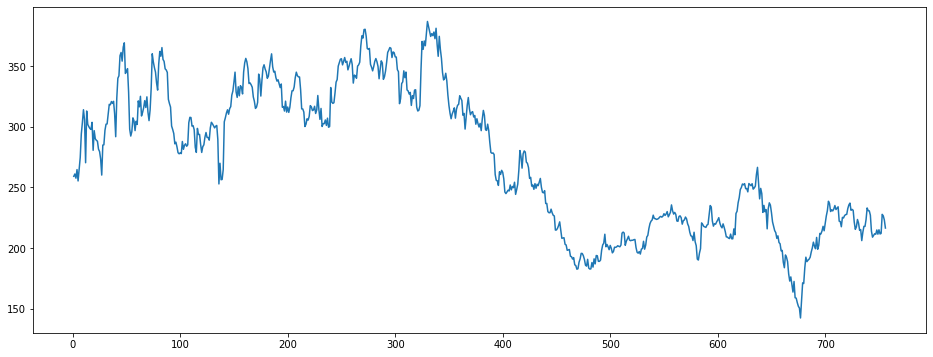

In [11]:
df['open'].plot(figsize=(16,6))

In [12]:
x=df[['open','high','low','volume']]
y=df['close']

In [13]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [14]:
x_train.shape

(567, 4)

In [15]:
x_test.shape

(189, 4)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
model=LinearRegression()

In [17]:
model.fit(x_train, y_train)

LinearRegression()

In [18]:
model.coef_

array([-6.44960464e-01,  9.15044900e-01,  7.27682695e-01, -5.27800087e-08])

In [19]:
model.intercept_

0.27182845454649396

In [20]:
prediction=model.predict(x_test)

In [21]:
print(x_test)

       open      high     low         volume
651  221.47  228.5000  220.00   3769083.0000
735  212.95  212.9900  206.52   3423139.0000
405  247.63  248.6600  243.00   3876494.0000
80   351.54  352.2500  332.00  10253770.0000
423  269.79  270.9500  266.11   3618336.0000
..      ...       ...     ...            ...
458  203.05  209.0000  202.50   4684269.0000
145  310.25  322.4400  310.19   5954247.0000
609  209.05  209.8199  204.02   2842028.0000
22   288.76  297.3256  286.52   6757652.0000
736  217.85  219.0000  212.66   2913511.0000

[189 rows x 4 columns]


In [22]:
prediction.shape

(189,)

In [23]:
dframe=pd.DataFrame(y_test,prediction)

In [24]:
dfr=pd.DataFrame({'Actual Price':y_test,'Predicted Price':prediction})
print(dfr)

     Actual Price  Predicted Price
651        226.38       226.411455
735        207.19       207.923268
405        244.90       244.717627
80         333.63       336.916454
423        269.23       267.652027
..            ...              ...
458        208.79       207.665500
145        316.53       320.625552
609        204.66       205.749294
22         295.20       294.238296
736        212.94       214.757251

[189 rows x 2 columns]


In [25]:
dfr.head(10)

,Actual Price,Predicted Price
651,226.38,226.411455
735,207.19,207.923268
405,244.90,244.717627
80,333.63,336.916454
423,269.23,267.652027
41,305.50,310.512544
670,166.58,166.070898
28,280.95,285.562450
702,223.41,222.192005
171,315.73,309.962256


In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
model.score(x_test,y_test)

0.9981461351122992

In [27]:
import math
metrics.mean_absolute_error(y_test,prediction)

1.9453255918263173

In [28]:
metrics.mean_squared_error(y_test,prediction)

6.633708031391603

In [29]:
math.sqrt(metrics.mean_squared_error(y_test,prediction))

2.575598577300353

<AxesSubplot:>

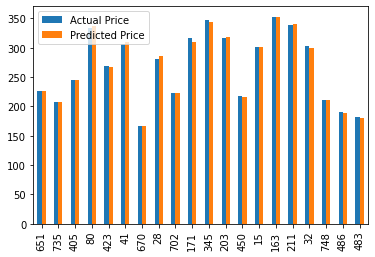

In [30]:
graph=dfr.head(20)
graph.plot(kind='bar')

In [31]:
model.predict([[259.06, 263.2800, 254.5376, 6189026]])

c:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([258.99734192])